In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [32]:
data = pd.read_csv('data.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [34]:
class KMeans:
    def __init__(self,data_n,n_clusters=5):
        self.data=data_n.values
        self.n_clusters=n_clusters

        self.create_centroid()
        print(self.centroid)
        #self._run()
        
    def dist(self,centroid):
        return np.sqrt(np.sum((centroid-self.data)**2))
    def create_centroid(self):
        self.centroid= [[i,np.random.uniform(self.data.min(),self.data.max()),np.random.uniform(self.data.min(),self.data.max())] for i in range(self.n_clusters)]
    def _run(self):
        previous_centroid=None
        current_centroid=self.centroid
        points={}
        for i in range(len(self.centroid)):
            points.update({self.centroid[i][0]:[]})
        while(previous_centroid!=current_centroid):

            for k in range(len(self.data)):
                min_dist=np.inf
                centroid_k=None
                for i in range(len(current_centroid)):
                    tmp=self.dist(current_centroid[i][1:])
                    if(tmp<min_dist):
                        min_dist=tmp
                        centroid_k=i
                print(centroid_k)
                points[current_centroid[centroid_k][0]].append(self.data[k])
            previous_centroid=current_centroid
            print(len(points[1]))
            for i in range(len(current_centroid)):
                avg=0

                avg=np.mean(points[i],axis=0)
                print("avg",avg)
                current_centroid[i][1:]=avg

            dup=points
            points={current_centroid[i][0]:dup[current_centroid[i][0]] for i in range(len(current_centroid))}
        
        
        self.clusters=points
        l=[]
        for i in self.data:
            for j in range(self.n_clusters):
                if(i in points[j]):
                    l+=j
        self.KMeans_labels=l
    
    def  silhouette_score(self):
        return silhouette_score(self.data, self.KMeans_labels, metric='euclidean')

In [36]:
data[['Annual Income (k$)','Spending Score (1-100)']]

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [42]:
z=KMeans(data[['Annual Income (k$)','Spending Score (1-100)']])

[[0, 130.39252554261654, 125.37316429519889], [1, 7.183376892865335, 42.82058666351333], [2, 102.652260622313, 104.45047977285375], [3, 53.832039788338264, 53.822816653555584], [4, 68.38120723973773, 117.3009065905513]]


<Axes: xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

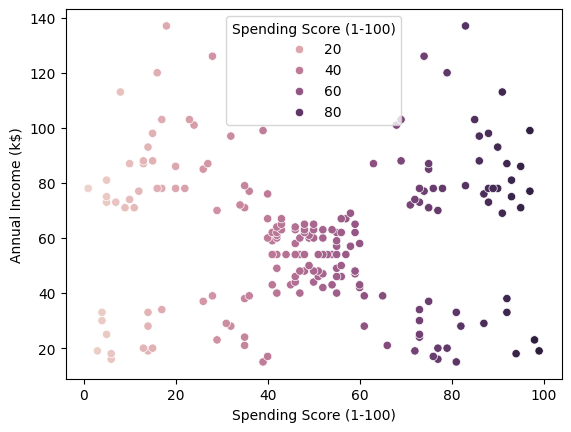

In [44]:
sns.scatterplot(data = data, x = 'Spending Score (1-100)', y = 'Annual Income (k$)', hue = 'Spending Score (1-100)')

In [46]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data[['Age','Annual Income (k$)','Spending Score (1-100)']],data['Gender'])
x_train_n=preprocessing.normalize(x_train)
x_test_n=preprocessing.normalize(x_test)

In [47]:


from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=8,random_state=0)



In [48]:
kmeans.fit(x_train_n)

KMeans(random_state=0)

<Axes: xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

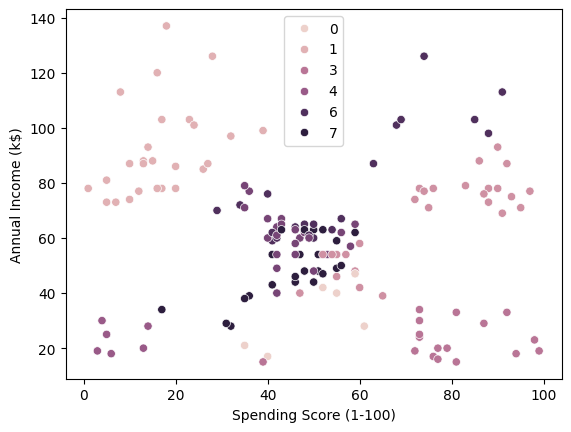

In [49]:
sns.scatterplot(data = x_train, x = 'Spending Score (1-100)', y = 'Annual Income (k$)', hue = kmeans.labels_)

In [50]:
kmeans.labels_

array([7, 7, 5, 1, 2, 1, 2, 0, 7, 6, 4, 5, 1, 2, 1, 6, 5, 6, 1, 7, 6, 2,
       7, 7, 1, 2, 6, 7, 5, 7, 2, 4, 7, 3, 6, 7, 2, 1, 0, 5, 2, 6, 7, 1,
       6, 1, 7, 2, 7, 5, 1, 3, 1, 1, 7, 3, 2, 5, 7, 0, 1, 1, 3, 2, 2, 1,
       3, 7, 6, 1, 1, 5, 7, 2, 3, 0, 3, 3, 1, 6, 2, 5, 0, 0, 1, 3, 5, 6,
       4, 2, 2, 4, 5, 5, 5, 5, 7, 7, 7, 6, 2, 1, 6, 6, 2, 2, 6, 3, 3, 4,
       6, 5, 6, 5, 2, 6, 2, 7, 1, 1, 2, 3, 5, 1, 3, 5, 6, 2, 5, 2, 1, 7,
       5, 5, 3, 2, 7, 5, 3, 2, 6, 2, 3, 6, 1, 2, 1, 3, 5, 4])

In [52]:
wcss=[]
for i in range(2,10):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(data[[ 'Annual Income (k$)', 'Spending Score (1-100)']].values)
    wcss.append(kmeans.inertia_)

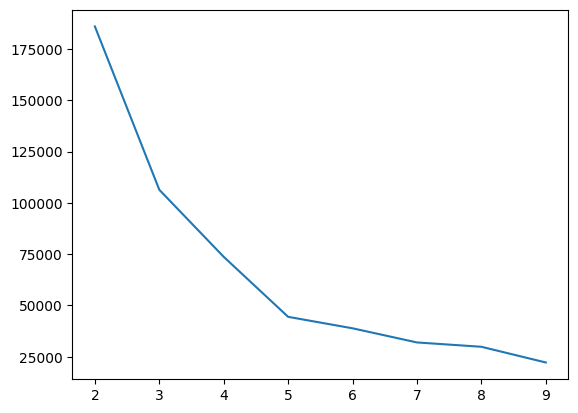

In [53]:
import matplotlib.pyplot as plt
plt.plot(range(2,10),wcss)